In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score

#from cm import plot_confusion_matrix

In [87]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [88]:
derate = pd.read_csv('../data/derate_diagnostics.csv', index_col=0, 
                     parse_dates=['EventTimeStamp', 'DerateTimeStamp'])

In [89]:
derate['TimeToDerate'] = derate['DerateTimeStamp'] - derate['EventTimeStamp']

In [90]:
derate_df = derate[derate['ecuMake'].isin(['CMMNS', '?MMNS', '??MNS'])]

In [91]:
derate_df = derate_df[['RecordID', 'EquipmentID', 'ESS_Id', 'ecuSoftwareVersion', 'ecuModel', 'activeTransitionCount', 
                       'EventTimeStamp', 'DerateTimeStamp', 'TimeToDerate', 'fault_count1', 'fault_count7', 
                       'fault_count30', 'SpnFmi', 'BarometricPressure', 'DistanceLtd', 'EngineCoolantTemperature', 
                       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 
                       'FuelLtd', 'FuelRate', 'IntakeManifoldTemperature', 
                       'SwitchedBatteryVoltage', 'TurboBoostPressure']]

In [92]:
derate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208380 entries, 5877 to 577229
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   RecordID                   208380 non-null  int64          
 1   EquipmentID                208380 non-null  object         
 2   ESS_Id                     208380 non-null  int64          
 3   ecuSoftwareVersion         208200 non-null  object         
 4   ecuModel                   208380 non-null  object         
 5   activeTransitionCount      208380 non-null  int64          
 6   EventTimeStamp             208380 non-null  datetime64[ns] 
 7   DerateTimeStamp            61421 non-null   datetime64[ns] 
 8   TimeToDerate               61421 non-null   timedelta64[ns]
 9   fault_count1               208380 non-null  float64        
 10  fault_count7               208380 non-null  float64        
 11  fault_count30              208380 no

In [93]:
derate_df.columns

Index(['RecordID', 'EquipmentID', 'ESS_Id', 'ecuSoftwareVersion', 'ecuModel', 'activeTransitionCount', 'EventTimeStamp', 'DerateTimeStamp', 'TimeToDerate', 'fault_count1', 'fault_count7', 'fault_count30', 'SpnFmi', 'BarometricPressure', 'DistanceLtd', 'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLtd', 'FuelRate', 'IntakeManifoldTemperature', 'SwitchedBatteryVoltage', 'TurboBoostPressure'], dtype='object')

In [94]:
obj_to_flt = ['BarometricPressure', 'DistanceLtd', 'EngineCoolantTemperature', 'EngineOilPressure', 
              'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLtd', 'FuelRate', 
              'IntakeManifoldTemperature', 'SwitchedBatteryVoltage', 'TurboBoostPressure']

In [95]:
derate_df[obj_to_flt] = derate_df[obj_to_flt].apply(pd.to_numeric, errors='coerce')

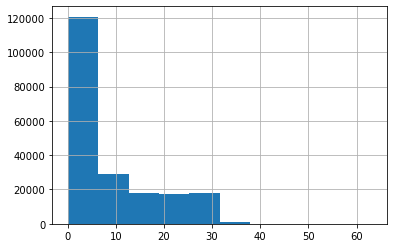

In [96]:
derate_df['TurboBoostPressure'].hist()

In [98]:
derate_df

,RecordID,EquipmentID,ESS_Id,ecuSoftwareVersion,ecuModel,activeTransitionCount,EventTimeStamp,DerateTimeStamp,TimeToDerate,fault_count1,fault_count7,fault_count30,SpnFmi,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,SwitchedBatteryVoltage,TurboBoostPressure
5877,719343,306,14672852,05317106*04075152*092613211021*09300006*G1*BDR*,6X1u13D1500000000,1,2017-02-22 08:56:31,2018-09-07 11:22:40,562 days 02:26:09,1.0,1.0,1.0,84-2,14.2825,239970.10,194.0,16.0,23.78,197.71250,599.625,5940.55,32404.268501,0.607598,138.2,NaN,0.58
5892,340897,306,6773471,05317106*04075152*092613211021*09300006*G1*BDR*,6X1u13D1500000000,2,2016-01-11 05:05:09,2018-09-07 11:22:40,970 days 06:17:31,1.0,1.0,1.0,111-17,14.5000,191975.90,26.6,30.0,47.56,24.12500,803.125,3945.25,25275.717763,2.509642,15.8,NaN,0.00
5893,478875,306,9257700,05317106*04075152*092613211021*09300006*G1*BDR*,6X1u13D1500000000,2,2016-05-18 05:20:17,2018-09-07 11:22:40,842 days 06:02:23,1.0,1.0,1.0,111-17,14.4275,212342.00,77.0,15.0,42.34,73.40000,599.750,4593.75,28203.008272,1.043483,68.0,NaN,0.00
5894,479898,306,9280672,05317106*04075152*092613211021*09300006*G1*BDR*,6X1u13D1500000000,3,2016-05-19 05:17:53,2018-09-07 11:22:40,841 days 06:04:47,2.0,2.0,2.0,111-17,14.4275,212504.30,71.6,16.0,42.92,69.51875,599.250,4599.85,28227.840444,1.030274,62.6,NaN,0.29
5895,480940,306,9303373,05317106*04075152*092613211021*09300006*G1*BDR*,6X1u13D1500000000,4,2016-05-20 05:17:00,2018-09-07 11:22:40,840 days 06:05:40,2.0,3.0,3.0,111-17,14.4275,212697.10,80.6,13.0,42.34,77.50625,600.375,4606.95,28256.503112,0.911396,73.4,NaN,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577225,1030974,310,53580032,05317106*04133655*061416163421*09401361*G1*BDR*,6X1u13D1500000000,2,2018-06-28 21:51:13,NaT,NaT,1.0,2.0,3.0,5394-5,14.2825,272598.70,190.4,76.0,38.86,205.41870,1302.125,8048.10,36733.652175,14.106830,129.2,NaN,20.01
577226,1016600,310,49722213,05317106*04133655*061416163421*09401361*G1*BDR*,6X1u13D1500000000,1,2018-05-22 17:27:54,NaT,NaT,1.0,1.0,1.0,5394-7,14.3550,267594.50,183.2,93.0,38.28,217.45630,1316.375,7880.85,36081.939722,19.231790,129.2,NaN,29.58
577227,4246,R1762,1048627,05317106*04119044*051914190353*09400015*G1*BDR*,6X1u13D1500000000,43,2015-02-24 13:45:06,NaT,NaT,1.0,1.0,1.0,1761-17,14.0650,79796.12,185.0,83.0,42.34,222.68750,1333.250,1527.45,11368.512172,14.727640,82.4,3276.75,16.82
577228,4428,R1762,1051023,05317106*04119044*051914190353*09400015*G1*BDR*,6X1u13D1500000000,11,2015-02-24 15:31:17,NaT,NaT,1.0,1.0,1.0,1761-18,14.1375,79913.24,179.6,53.0,42.34,222.68750,1352.875,1529.25,11390.042194,9.166799,82.4,3276.75,8.99


## Inspect Maggi's dataset

In [2]:
faults = pd.read_csv('../data/faults_15_15.csv')

In [3]:
faults.head()

,EquipmentID,EventTimeStamp,InFailureWindow,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,...,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1330,2015-05-01 16:41:20,0,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1330,2015-05-05 23:46:19,0,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1330,2015-05-19 19:33:41,0,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1330,2015-05-20 16:15:08,0,14.2825,490367.8,188.6,30.0,37.70,177.3500,1367.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#faults.columns.to_list()

In [20]:
derate_appearances = pd.DataFrame(faults[faults['InFailureWindow']==1].iloc[:, 16:].astype(bool).sum(axis=0).\
                                     sort_values()).reset_index()

In [21]:
no_derate_appearances = pd.DataFrame(faults[faults['InFailureWindow']==0].iloc[:, 16:].astype(bool).sum(axis=0).\
                                     sort_values()).reset_index()

In [22]:
derate_proportion = pd.merge(derate_appearances, no_derate_appearances, on='index', )

In [24]:
derate_proportion.columns = ['spn', 'derate', 'no_derate']

In [26]:
derate_proportion['proportion'] = derate_proportion['derate'] / (derate_proportion['no_derate'] + derate_proportion['derate'])

In [28]:
derate_proportion.sort_values('proportion', ascending=True)

,spn,derate,no_derate,proportion
0,Summ_411,0,1299,0.000000
33,Summ_101,0,2206,0.000000
34,Summ_95,0,339,0.000000
36,Summ_7854,0,246,0.000000
37,Summ_1072,0,38,0.000000
...,...,...,...,...
102,Summ_444,38,91,0.294574
124,Summ_5024,129,196,0.396923
120,Summ_6802,90,135,0.400000
27,Summ_4346,0,0,NaN


In [36]:
no_derate_spns = derate_proportion[derate_proportion['proportion']==0]['spn'].to_list()

In [37]:
positive_faults = faults.drop(no_derate_spns, axis=1)

In [38]:
positive_faults

,EquipmentID,EventTimeStamp,InFailureWindow,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,...,Summ_630,Summ_641,Summ_651,Summ_6802,Summ_723,Summ_81,Summ_862,Summ_91,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1330,2015-05-01 16:41:20,0,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1330,2015-05-05 23:46:19,0,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1330,2015-05-19 19:33:41,0,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1330,2015-05-20 16:15:08,0,14.2825,490367.8,188.6,30.0,37.70,177.3500,1367.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192827,310,2018-05-22 17:27:54,0,14.3550,267594.5,183.2,93.0,38.28,217.4563,1316.375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192828,310,2018-05-29 23:32:03,0,14.1375,268609.8,185.0,27.0,37.70,212.2813,1124.750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192829,310,2018-06-04 18:14:39,0,14.2825,269051.3,183.2,82.0,36.54,203.9000,1039.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192830,310,2018-06-05 08:45:17,0,14.2825,269223.1,186.8,72.0,35.38,213.7437,1050.375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
